# 🏠 Análisis Exploratorio: Dataset de Precios de Viviendas

📌 Fuente: [Housing Prices Dataset – Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)  
📅 Autor: Yasser, M. (2022)  
👨‍💻 Autor del análisis: Pascual Ordiñana Soler

---

## 📚 Índice

1. [🔍 Introducción](#1-🔍-introducción)  
2. [📦 Carga y descripción inicial del dataset](#2-📦-carga-y-descripción-inicial-del-dataset)  
3. [🧼 Limpieza y preparación de datos](#3-🧼-limpieza-y-preparación-de-datos)  
4. [📊 Análisis univariado](#4-📊-análisis-univariado)  
   - Variables numéricas  
   - Variables categóricas  
5. [📈 Análisis bivariado](#5-📈-análisis-bivariado)  
   - Correlaciones  
   - Relaciones entre precio y otras variables  
6. [📉 Detección de outliers](#6-📉-detección-de-outliers)  
7. [🧠 Patrones y estructuras subyacentes](#7-🧠-patrones-y-estructuras-subyacentes)  
8. [📌 Conclusiones del EDA](#8-📌-conclusiones-del-eda)  
9. [📁 Próximos pasos: preparación para aprendizaje no supervisado](#9-📁-próximos-pasos-aprendizaje-no-supervisado)

---

> 💡 *Este notebook forma parte de la asignatura de Aprendizaje No Supervisado del Máster en Inteligencia Artificial. Está enfocado en explorar la estructura oculta del dataset como primer paso antes de aplicar técnicas como clustering o reducción de dimensionalidad.*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para gráficos bonitos
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [3]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 🎯 Objetivo de esta sección

Queremos obtener una visión general rápida del conjunto de datos para responder a estas preguntas:

- 🔢 **¿Cuántas columnas hay y de qué tipo son?**  
  Identificar si son numéricas, categóricas, booleanas, etc.

- ❓ **¿Hay valores faltantes?**  
  Comprobar si existen `NaN` o datos ausentes que debamos limpiar o imputar.

- 📏 **¿Cómo son los rangos de las variables?**  
  Observar máximos, mínimos, medias y desviaciones estándar para detectar posibles valores extremos.

- 🚨 **¿Hay outliers?**  
  Identificar si algunas variables presentan valores atípicos que puedan distorsionar el análisis.


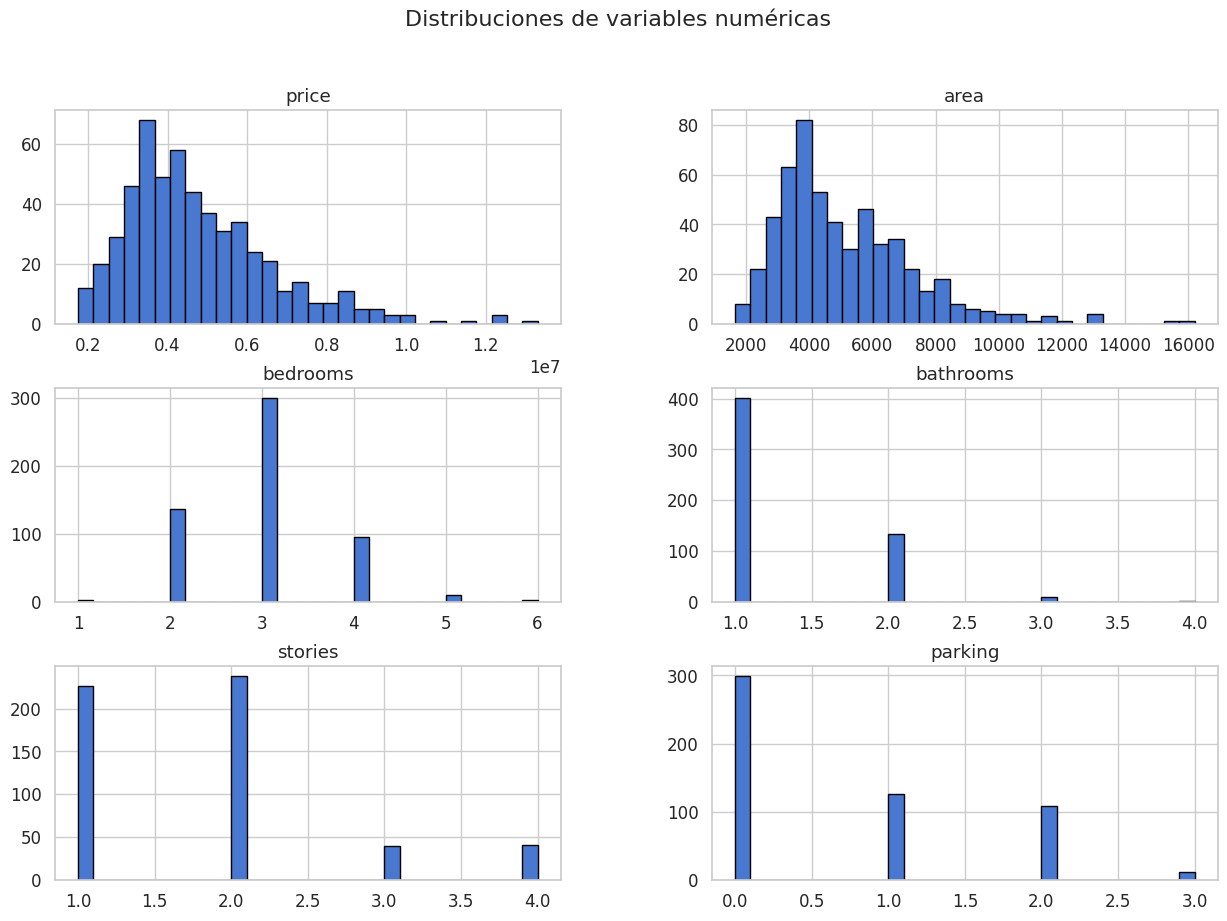

In [5]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.show()

### 🔍 ¿Qué puedes encontrar aquí?

Al visualizar las distribuciones de las variables numéricas, puedes detectar:

- 📈 **Sesgo en la distribución de variables**  
  Por ejemplo, el precio de las viviendas suele estar **sesgado a la derecha** (muchas casas económicas y pocas muy caras).

- 🚨 **Outliers o valores atípicos**  
  Variables como `price`, `area` o `bedrooms` pueden contener valores extremos que afecten al análisis o al entrenamiento de modelos.

- 🧩 **Patrones generales en los datos**  
  Como agrupaciones, saltos o picos que indiquen diferentes segmentos de viviendas.

In [6]:
categorical = df.select_dtypes(include=['object'])
for col in categorical.columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



### 🧠 ¿Qué puedes encontrar aquí?

Al analizar las variables categóricas, puedes descubrir:

- 📊 **Dominancia de ciertas categorías**  
  Por ejemplo, puede que la mayoría de las propiedades estén marcadas como `"furnished"` en la variable `furnishingstatus`, lo cual indica una tendencia clara en el tipo de oferta.

- 🧾 **Variables candidatas para codificación**  
  Identificar columnas categóricas que necesitarán ser transformadas (por ejemplo, mediante **one-hot encoding** o **label encoding**) antes de utilizarlas en modelos de machine learning.

- 🧩 **Posibles patrones por categoría**  
  Como diferencias significativas en el precio según el estado de amueblamiento, acceso a carretera principal, etc.


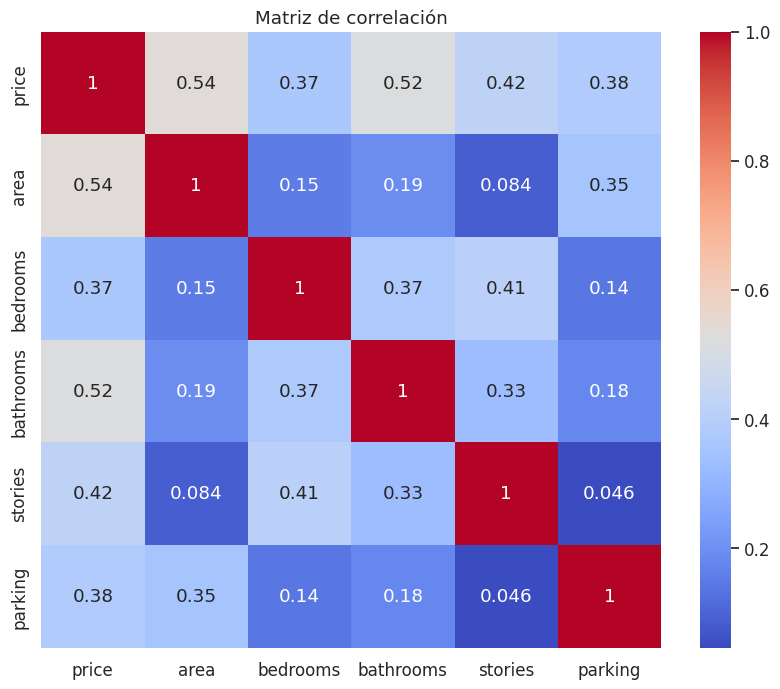

In [8]:
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

### 🔎 Insights esperados

Al observar la matriz de correlación, es probable que encuentres:

- 📈 **Alta correlación positiva entre `area` y `price`**  
  A mayor superficie construida, mayor suele ser el precio de la vivienda.

- 🛏️ **Correlaciones moderadas con otras variables**  
  Variables como `bedrooms` o `bathrooms` podrían mostrar cierta correlación con el precio, aunque no tan fuerte como el área.

- 🧩 **Relaciones útiles para el modelado**  
  Estas correlaciones pueden ayudarte a seleccionar variables relevantes para futuros modelos o a interpretar patrones en el dataset.

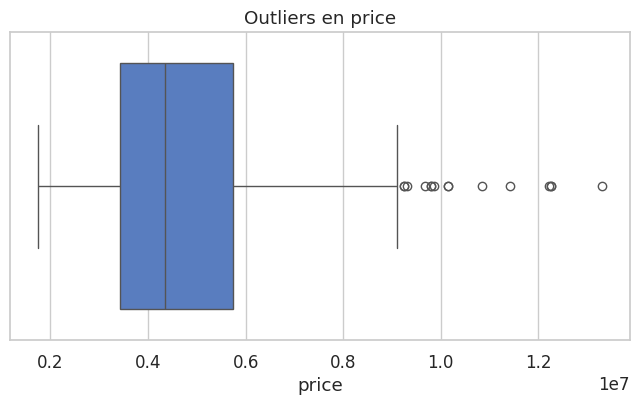

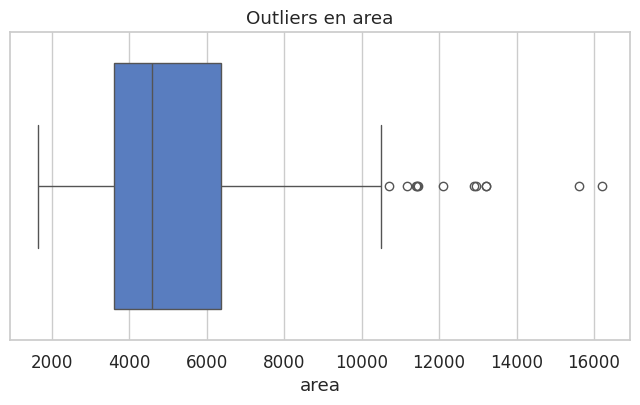

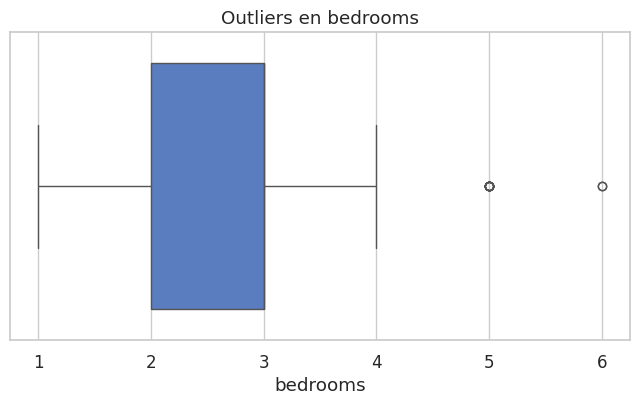

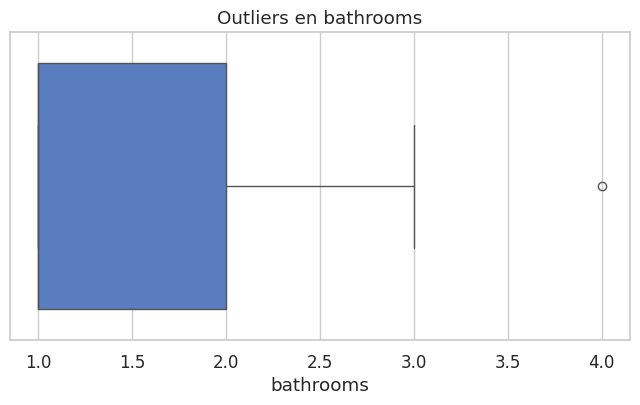

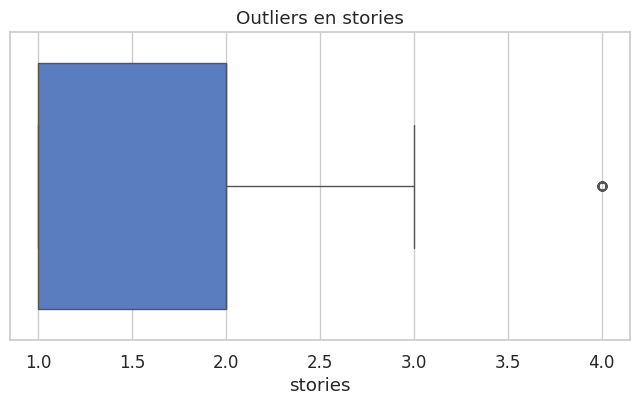

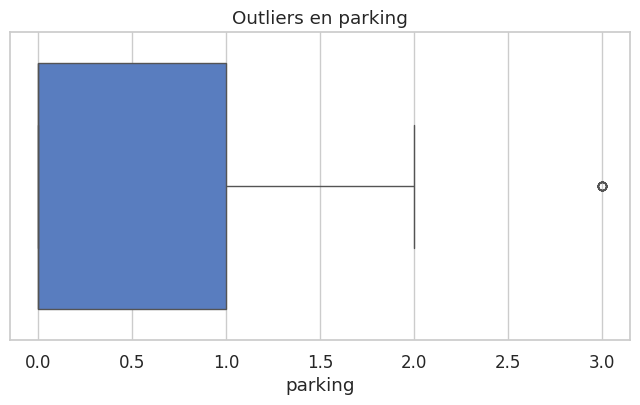

In [9]:
numerical = df.select_dtypes(include=np.number).columns

for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
    plt.show()

### 🧠 ¿Qué hacer si encuentras outliers fuertes?

Si detectas valores atípicos significativos, puedes considerar varias estrategias:

- ❌ **Eliminarlos**  
  Si los outliers son errores o casos muy extremos, puedes optar por descartarlos del análisis.

- 🔄 **Aplicar una transformación logarítmica**  
  Útil especialmente en variables como `price` o `area`, para reducir el sesgo y comprimir los rangos.

- 📉 **Escalar los datos**  
  Métodos como **Min-Max Scaling** o **Standard Scaling** ayudan a mitigar el impacto de los outliers en modelos sensibles a las magnitudes.


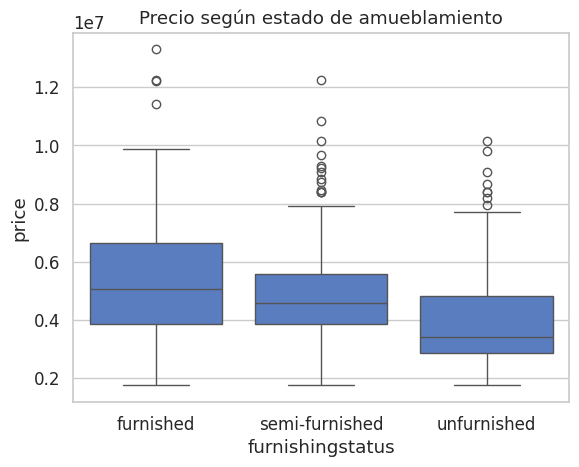

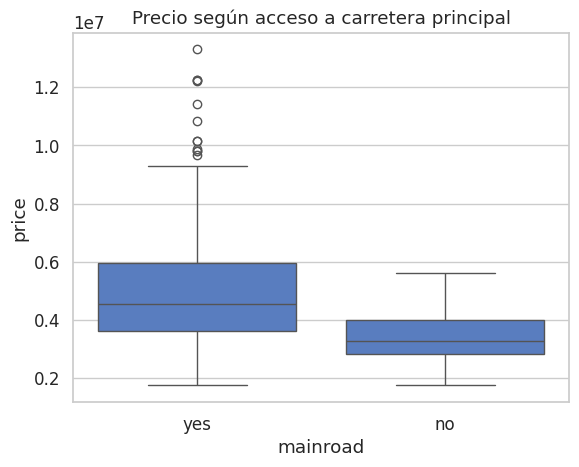

In [10]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title("Precio según estado de amueblamiento")
plt.show()

sns.boxplot(x='mainroad', y='price', data=df)
plt.title("Precio según acceso a carretera principal")
plt.show()

### 🧠 Posibles patrones interesantes

Durante el análisis exploratorio, podrías identificar relaciones como:

- 🛋️ **Propiedades amuebladas con precios más altos**  
  Las viviendas con estado `furnished` podrían mostrar una tendencia a tener mayor valor de mercado.

- 🛣️ **Acceso a carretera principal como factor de valor**  
  Las propiedades con buen acceso a vías principales suelen estar mejor valoradas, lo cual puede reflejarse en el precio.

- 📌 **Otros factores categóricos relevantes**  
  Como el tipo de vecindario, disponibilidad de estacionamiento o cercanía a servicios, que podrían influir en el precio.


### 🧠 Estructura subyacente (Insights clave)

En esta sección se responde directamente al objetivo del ejercicio:  
**Identificar estructuras o patrones ocultos en los datos.**

#### 📌 Ejemplos de agrupaciones naturales (clusters):

- 🏡 **Cluster 1: Propiedades de alta gama**  
  - Muchas habitaciones  
  - Gran área construida  
  - Amuebladas  
  - Acceso a carretera principal  
  - Precio elevado

- 🛏️ **Cluster 2: Viviendas económicas**  
  - Menor superficie  
  - Pocas habitaciones  
  - No amuebladas  
  - Ubicadas fuera de zonas principales  
  - Precio bajo

> 💡 Este análisis prepara el terreno para aplicar técnicas de **aprendizaje no supervisado** como **clustering** o **PCA**, que podrían realizarse en el siguiente ejercicio.

---

### 🧾 Conclusión del Ejercicio 1

📊 **Resumen de descubrimientos clave:**

- `area`, `bedrooms` y `bathrooms` están **moderadamente correlacionadas** con `price`.
- Se observan **patrones interesantes** según el estado de amueblamiento y el acceso a carretera principal.
- Existen **outliers significativos** en variables como `price` y `area`.
- Ya se **intuyen agrupaciones naturales** de viviendas basadas en tamaño, precio y características generales.

---

✅ ¡Con este análisis ya tienes una base sólida para aplicar técnicas de aprendizaje no supervisado!
